## Observations and Insights 

In [ ]:
#Observations
# Mouse weight is positively correlated with Tumor Volume 
# Capumolin was the most effective drug with the most amount of unique mice tested 
# Infubinol was the only drug to have an outlier 


In [451]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import pearsonr 
from scipy import stats 


# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset 
mouse_results = pd.merge(mouse_metadata, study_results, how="left", on="Mouse ID")

# Display the data table for preview
mouse_results.head(100)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
95,u364,Capomulin,Male,18,17,0,45.000000,0
96,u364,Capomulin,Male,18,17,5,45.760886,1
97,u364,Capomulin,Male,18,17,10,46.568417,2
98,u364,Capomulin,Male,18,17,15,47.212200,2


In [452]:
# Checking the number of mice.
mouse_count = mouse_results["Mouse ID"].nunique()
mouse_count

249

In [453]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# clean_mouse_results=mouse_results.sort_values("Timepoint").drop_duplicates(["Mouse ID"], keep="last")
clean_mouse_results["Mouse ID"].value_counts()

j913    10
x402    10
k403    10
l509    10
o287    10
        ..
n482     1
u153     1
o848     1
h428     1
l872     1
Name: Mouse ID, Length: 249, dtype: int64

In [454]:
# Optional: Get all the data for the duplicate mouse ID. 


In [455]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. 

clean_mouse_results = mouse_results.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_mouse_results

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [456]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_mouse_results["Mouse ID"].nunique()
clean_mouse_count 

249

## Summary Statistics

In [457]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data_mean = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
data_median = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
data_variance = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
data_standard_deviation = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
data_sem = clean_mouse_results.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
data = {
    "Mean": data_mean, 
    "Median": data_median, 
    "Variance": data_variance, 
    "Standard Deviation": data_standard_deviation,
    "SEM": data_sem
}


summary_statistics = pd.DataFrame(data, columns = ["Mean", "Median", "Variance", "Standard Deviation", "SEM"])
summary_statistics
# This method produces everything in a single groupby function


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

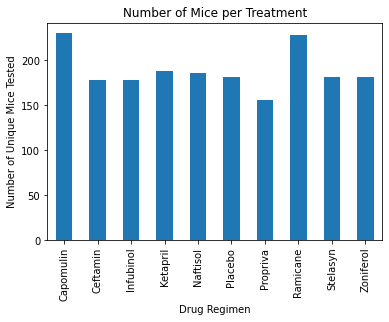

In [458]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
y_value = clean_mouse_results.groupby(["Drug Regimen"]).count()["Mouse ID"]

#show bar graph
y_value.plot(kind='bar')
plt.ylabel("Number of Unique Mice Tested")
plt.title("Number of Mice per Treatment")
plt.show()

#bar_graph_df = clean_mouse_data_df[["Drug Regimen", "Mouse ID"]]
#bar_graph_df = bar_graph_df.set_index("Drug Regimen")

#show bar graph


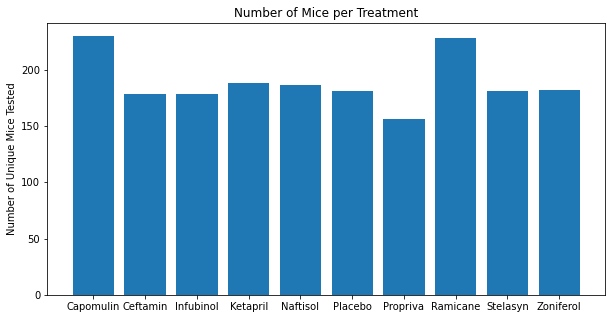

In [459]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#get drug names 
drug_names = summary_statistics.index.tolist()
drug_names
#get test_subject_count
test_subject_count = clean_mouse_results.groupby(["Drug Regimen"])["Mouse ID"].count().tolist()
test_subject_count

#set x-axis = drug names 
xaxis = np.arange(len(test_subject_count))
xaxis = drug_names

xaxis

#create the graph 
plt.figure(figsize=(len(xaxis), 5))
plt.bar(xaxis, test_subject_count)

plt.title("Number of Mice per Treatment")
plt.ylabel("Number of Unique Mice Tested")
plt.show()


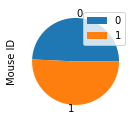

In [460]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data_df = pd.DataFrame(clean_mouse_results.groupby(["Sex"]).count()).reset_index()
gender_data_df


#Create a table of gender values 
gender_data_df = gender_data_df[["Sex", "Mouse ID"]]
gender_data_df 

plot_pie = gender_data_df.plot.pie(y="Mouse ID", figsize=(4,2))
plt.show()


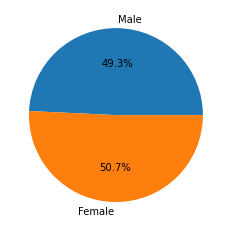

In [461]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Generate a pie plot showing the distribution of female versus male mice using pandas

gender_data_df = pd.DataFrame(clean_mouse_results.groupby(["Sex"]).count()).reset_index()
gender_data_df


#Create a table of gender values 
gender_data_df = gender_data_df[["Sex", "Mouse ID"]]
gender_data_df


my_labels = "Male", "Female"
plt.pie(gender_data_df["Mouse ID"], labels= my_labels, autopct="%1.1f%%")
plt.show()


## Quartiles, Outliers and Boxplots

In [462]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_df = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Capomulin",:]
Ramicane_df = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Ramicane",:]
Infubinol_df = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Infubinol",:]
Ceftamin_df = clean_mouse_results.loc[clean_mouse_results["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin_df.groupby("Mouse ID").max()["Timepoint"]
Capomulin_volume = pd.DataFrame(Capomulin_last)

Ramicane_last = Ramicane_df.groupby("Mouse ID").max()["Timepoint"]
Ramicane_volume = pd.DataFrame(Ramicane_last)

Infubinol_last = Infubinol_df.groupby("Mouse ID").max()["Timepoint"]
Infubinol_volume = pd.DataFrame(Infubinol_last)

Ceftamin_last = Ceftamin_df.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_volume = pd.DataFrame(Ceftamin_last)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_merge = pd.merge(Capomulin_volume, clean_mouse_results, on=("Mouse ID", "Timepoint"), how="left")
Capomulin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [463]:
Ramicane_merge = pd.merge(Ramicane_volume, clean_mouse_results, on=("Mouse ID", "Timepoint"), how="left")
Ramicane_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2
5,c758,45,Ramicane,Male,9,17,33.397653,1
6,d251,45,Ramicane,Female,8,19,37.311236,2
7,e662,45,Ramicane,Male,8,24,40.659006,2
8,g791,45,Ramicane,Male,11,16,29.128472,1
9,i177,45,Ramicane,Male,10,18,33.562402,3


In [464]:
Infubinol_merge = pd.merge(Infubinol_volume, clean_mouse_results, on=("Mouse ID", "Timepoint"), how="left")
Infubinol_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2
5,c326,5,Infubinol,Female,18,25,36.321346,0
6,c895,30,Infubinol,Female,7,29,60.969711,2
7,e476,45,Infubinol,Male,23,26,62.435404,1
8,f345,45,Infubinol,Male,23,26,60.918767,1
9,i386,40,Infubinol,Female,23,29,67.289621,4


In [465]:
Ceftamin_merge = pd.merge(Ceftamin_volume, clean_mouse_results, on=("Mouse ID", "Timepoint"), how="left")
Ceftamin_merge

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2
5,h531,5,Ceftamin,Male,5,27,47.784682,0
6,j296,45,Ceftamin,Female,24,30,61.849023,3
7,k210,45,Ceftamin,Male,15,28,68.923185,3
8,l471,45,Ceftamin,Female,7,28,67.748662,1
9,l490,30,Ceftamin,Male,24,26,57.918381,3


In [466]:

# Calculate the IQR and quantitatively determine if there are any potential outliers. 


    # Determine outliers using upper and lower bounds

#Capomulin 
Capomulin_tumors = Capomulin_merge["Tumor Volume (mm3)"]

quartiles = Capomulin_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
IQR = upper_quartile-lower_quartile 

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

print(f"The IQR of Capomulin: {IQR}")
print(f"Values below {lower_bound} are outliers")
print(f"Values below {upper_bound} are outliers")    

The IQR of Capomulin: 7.781863460000004
Values below 20.70456164999999 are outliers
Values below 51.83201549 are outliers


In [467]:
#Ramicane
Ramicane_tumors = Ramicane_merge["Tumor Volume (mm3)"]

quartiles = Ramicane_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
IQR = upper_quartile-lower_quartile 

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

print(f"The IQR of Ramicane: {IQR}")
print(f"Values below {lower_bound} are outliers")
print(f"Values below {upper_bound} are outliers")

The IQR of Ramicane: 9.098536719999998
Values below 17.912664470000003 are outliers
Values below 54.30681135 are outliers


In [468]:
#Infubinol
Infubinol_tumors = Infubinol_merge["Tumor Volume (mm3)"]

quartiles = Infubinol_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
IQR = upper_quartile-lower_quartile 

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

print(f"The IQR of Infubinol: {IQR}")
print(f"Values below {lower_bound} are outliers")
print(f"Values below {upper_bound} are outliers")

The IQR of Infubinol: 11.477135160000003
Values below 36.83290494999999 are outliers
Values below 82.74144559000001 are outliers


In [469]:
Ceftamin_tumors = Ceftamin_merge["Tumor Volume (mm3)"]

quartiles = Ceftamin_tumors.quantile([.25,.5,.75])
lower_quartile = quartiles[.25]
upper_quartile = quartiles[.75]
IQR = upper_quartile-lower_quartile 

lower_bound = lower_quartile - (1.5*IQR)
upper_bound = upper_quartile + (1.5*IQR)

print(f"The IQR of Ceftamin: {IQR}")
print(f"Values below {lower_bound} are outliers")
print(f"Values below {upper_bound} are outliers")

The IQR of Ceftamin: 15.577752179999997
Values below 25.355449580000002 are outliers
Values below 87.66645829999999 are outliers


{'whiskers': [<matplotlib.lines.Line2D at 0x7fdb5c600eb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fdb5c60d5b0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fdb5c600b50>,
 'medians': [<matplotlib.lines.Line2D at 0x7fdb5c60dc70>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fdb5c60df70>,
 'means': []}

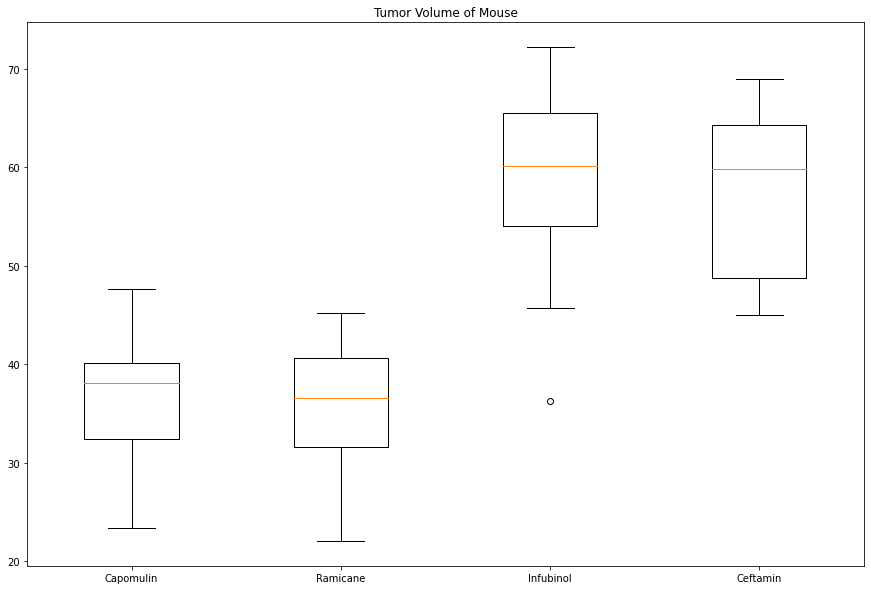

In [470]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mouse_dataplot = [Capomulin_tumors, Ramicane_tumors, Infubinol_tumors, Ceftamin_tumors]
Regimen = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

Graph = plt.subplots(figsize=(15,10))
plt.title("Tumor Volume of Mouse")

plt.boxplot(mouse_dataplot, labels=Regimen)

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

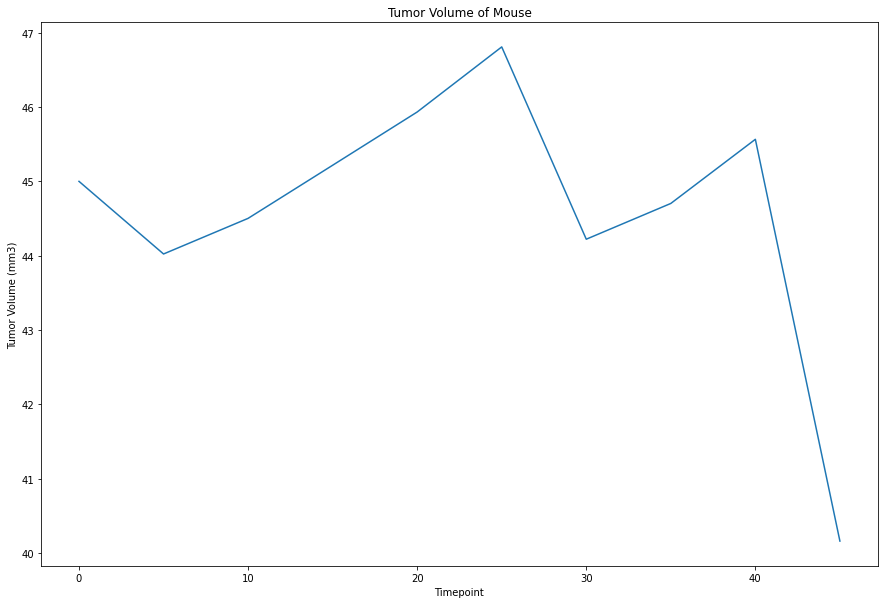

In [471]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
Cap_line = Capomulin_df.loc[Capomulin_df["Mouse ID"] == "g316"]
Cap_line 


Graph = plt.subplots(figsize=(15,10))
plt.title("Tumor Volume of Mouse")

plt.plot(Cap_line["Timepoint"], Cap_line["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Timepoint")

Text(0.5, 0, 'Weight (g)')

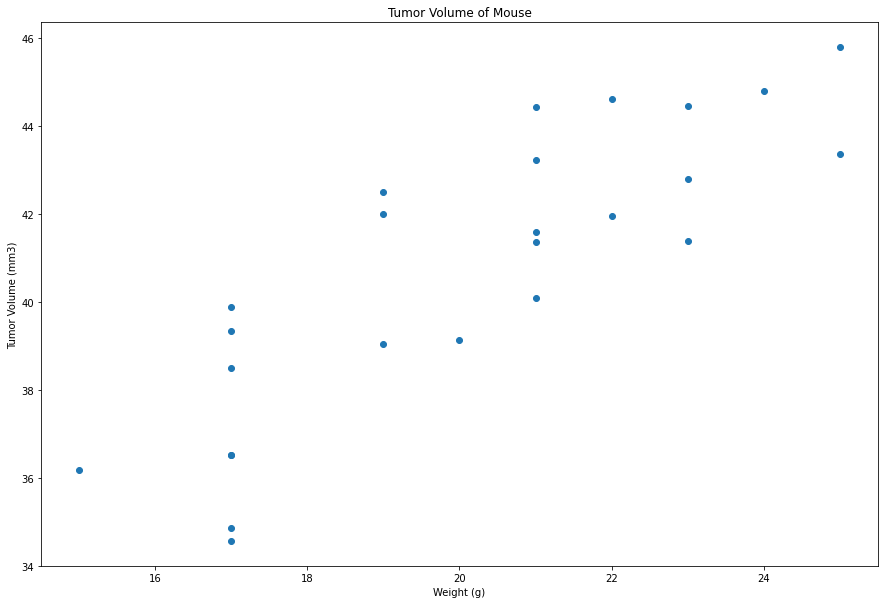

In [472]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
average_cap_volume = Capomulin_df.groupby(["Mouse ID"]).mean()

Graph = plt.subplots(figsize=(15,10))
plt.title("Tumor Volume of Mouse")

plt.scatter(average_cap_volume["Weight (g)"], average_cap_volume["Tumor Volume (mm3)"])
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")

## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.8419363424694717


Text(0.5, 0, 'Weight (g)')

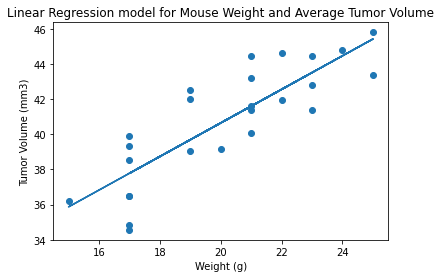

In [473]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation=st.pearsonr(average_cap_volume["Weight (g)"], average_cap_volume["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and average tumor volume is {correlation}")

xaxis = average_cap_volume["Weight (g)"]
yaxis = average_cap_volume["Tumor Volume (mm3)"]

#https://docs.scipy.org/doc/scipy-0.16.0/reference/generated/scipy.stats.linregress.html
(slope, intercept, rvalue, pvalue, stderr) = stats.linregress(xaxis, yaxis)
y = xaxis * slope + intercept 

plt.scatter(xaxis, yaxis)
plt.plot(xaxis, y) 
plt.title("Linear Regression model for Mouse Weight and Average Tumor Volume") 
plt.ylabel("Tumor Volume (mm3)")
plt.xlabel("Weight (g)")